# Working with Jupyter Notebooks
In this notebook we are going to work with Jupyter Notebooks. We will:
1. Load exported TF query files into a `pandas` dataframe
2. Do some data mining operations
3. Visualize some of our data results

# Getting the Data-Analysis workbench ready

## Loading Data-Analysis tools

In [5]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

## Importing our TF query results
We are now going to import the tsv files that we exported in our last tutorial.

In [6]:
BHSAbrahamSearch=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/BHSAbrahamSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
BHSAbrahamSearch.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
0,1,Genesis,11,26,5366,word,אַבְרָ֔ם,>BRM/
1,2,Genesis,11,27,5379,word,אַבְרָ֔ם,>BRM/
2,3,Genesis,11,29,5405,word,אַבְרָ֧ם,>BRM/
3,4,Genesis,11,29,5412,word,אַבְרָם֙,>BRM/
4,5,Genesis,11,31,5437,word,אַבְרָ֣ם,>BRM/


In [7]:
NTAbrahamSearchLex=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/NTAbrahamSearchLex.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
NTAbrahamSearchLex.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,anlex_lem1,lex_og1
0,1,Matthew,1,1,8,word,Ἀβραάμ.,Ἀβραάμ,Abraam
1,2,Matthew,1,2,9,word,Ἀβραὰμ,Ἀβραάμ,Abraam
2,3,Matthew,1,17,252,word,Ἀβραὰμ,Ἀβραάμ,Abraam
3,4,Matthew,3,9,1032,word,"Ἀβραάμ,",Ἀβραάμ,Abraam
4,5,Matthew,3,9,1047,word,Ἀβραάμ.,Ἀβραάμ,Abraam


# Some simple data mining operations
## `groupby` particular *column* by `sum` and  `count`

In [8]:
BHSAbrahamSearch.groupby(["lex1"]).sum()

,R,S2,S3,NODE1
lex1,,,,
>BRHM/,25742,4209,2704,10028097
>BRM/,2224,829,684,1155649


In [9]:
BHSAbrahamSearch.groupby(["lex1"]).count()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1
lex1,,,,,,,
>BRHM/,175,175,175,175,175,175,175
>BRM/,61,61,61,61,61,61,61


In [10]:
BHSAbrahamSearch.groupby(["lex1"]).count().sum()

R        236
S1       236
S2       236
S3       236
NODE1    236
TYPE1    236
TEXT1    236
dtype: int64

In [11]:
NTAbrahamSearchLex.groupby(["S1"]).count()

,R,S2,S3,NODE1,TYPE1,TEXT1,anlex_lem1,lex_og1
S1,,,,,,,,
1_Peter,1,1,1,1,1,1,1,1
2_Corinthians,1,1,1,1,1,1,1,1
Acts,7,7,7,7,7,7,7,7
Galatians,9,9,9,9,9,9,9,9
Hebrews,10,10,10,10,10,10,10,10
James,2,2,2,2,2,2,2,2
John,11,11,11,11,11,11,11,11
Luke,15,15,15,15,15,15,15,15
Mark,1,1,1,1,1,1,1,1


## `groupby` particular *column* by `count` and `sort_values`

In [12]:
NTAbrahamSearchLex.groupby(['S1']).count().sort_values(['anlex_lem1'], ascending=False)

,R,S2,S3,NODE1,TYPE1,TEXT1,anlex_lem1,lex_og1
S1,,,,,,,,
Luke,15,15,15,15,15,15,15,15
John,11,11,11,11,11,11,11,11
Hebrews,10,10,10,10,10,10,10,10
Galatians,9,9,9,9,9,9,9,9
Romans,9,9,9,9,9,9,9,9
Acts,7,7,7,7,7,7,7,7
Matthew,7,7,7,7,7,7,7,7
James,2,2,2,2,2,2,2,2
1_Peter,1,1,1,1,1,1,1,1


## Finding a value with `==`

In [13]:
BHSAbrahamSearch[(BHSAbrahamSearch['lex1'] == '>BRM/')]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
0,1,Genesis,11,26,5366,word,אַבְרָ֔ם,>BRM/
1,2,Genesis,11,27,5379,word,אַבְרָ֔ם,>BRM/
2,3,Genesis,11,29,5405,word,אַבְרָ֧ם,>BRM/
3,4,Genesis,11,29,5412,word,אַבְרָם֙,>BRM/
4,5,Genesis,11,31,5437,word,אַבְרָ֣ם,>BRM/
...,...,...,...,...,...,...,...,...
56,57,Genesis,17,1,7337,word,אַבְרָ֗ם,>BRM/
57,58,Genesis,17,3,7364,word,אַבְרָ֖ם,>BRM/
58,59,Genesis,17,5,7389,word,אַבְרָ֑ם,>BRM/
225,226,Nehemiah,9,7,387894,word,אַבְרָ֔ם,>BRM/


## Finding a value with `!=`

In [14]:
BHSAbrahamSearch[(BHSAbrahamSearch['lex1'] != '>BRM/')]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
59,60,Genesis,17,5,7393,word,אַבְרָהָ֔ם,>BRHM/
60,61,Genesis,17,9,7464,word,אַבְרָהָ֔ם,>BRHM/
61,62,Genesis,17,15,7567,word,אַבְרָהָ֔ם,>BRHM/
62,63,Genesis,17,17,7599,word,אַבְרָהָ֛ם,>BRHM/
63,64,Genesis,17,18,7624,word,אַבְרָהָ֖ם,>BRHM/
...,...,...,...,...,...,...,...,...
231,232,1_Chronicles,1,34,391594,word,אַבְרָהָ֖ם,>BRHM/
232,233,1_Chronicles,16,16,399828,word,אַבְרָהָ֔ם,>BRHM/
233,234,1_Chronicles,29,18,406526,word,אַבְרָהָ֞ם,>BRHM/
234,235,2_Chronicles,20,7,416124,word,אַבְרָהָ֥ם,>BRHM/


## Finding values with `&` 

In [15]:
BHSAbrahamSearch[
          (BHSAbrahamSearch['lex1'] == '>BRM/')
        & (BHSAbrahamSearch['S1'] != 'Genesis')
                ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
225,226,Nehemiah,9,7,387894,word,אַבְרָ֔ם,>BRM/
227,228,1_Chronicles,1,27,391518,word,אַבְרָ֖ם,>BRM/


In [16]:
BHSAbrahamSearch[
          (BHSAbrahamSearch['lex1'] == '>BRM/')
        & (BHSAbrahamSearch['R'] > 59 )
                ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
225,226,Nehemiah,9,7,387894,word,אַבְרָ֔ם,>BRM/
227,228,1_Chronicles,1,27,391518,word,אַבְרָ֖ם,>BRM/


In [17]:
BHSAbrahamSearch[
          (BHSAbrahamSearch['lex1'] == '>BRM/')
        & (BHSAbrahamSearch['S1'] == 'Genesis')
        & (BHSAbrahamSearch['S2'] > 17 )
                ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1


In Genesis "Abram" does not appear after chapter 17.

# Data Visualization
## Simple Bar Plotting

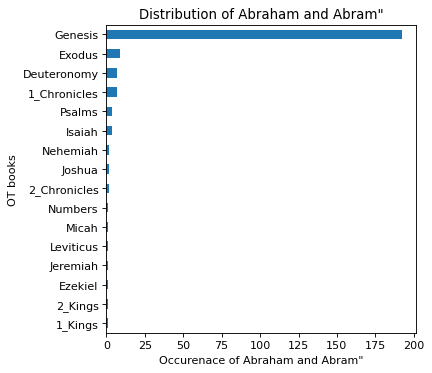

In [18]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
BHSAbrahamSearch.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('Occurenace of Abraham and Abram"')
plt.ylabel('OT books')
plt.title('Distribution of Abraham and Abram"')
plt.show()

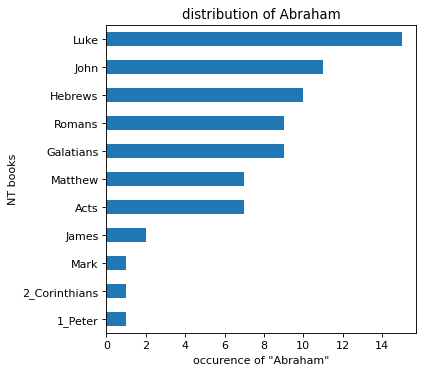

In [19]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
NTAbrahamSearchLex.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('occurence of "Abraham"')
plt.ylabel('NT books')
plt.title('distribution of Abraham')
plt.show()

## Simple Scatter-Plotting

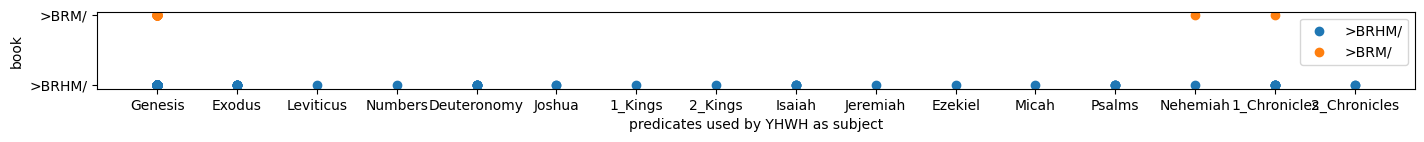

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 1)

for S1, df in BHSAbrahamSearch.groupby('lex1'):
    ax.scatter(x="S1", y="lex1", data=df, label=S1)

ax.set_xlabel("predicates used by YHWH as subject")
ax.set_ylabel("book")
ax.legend();

## Simple ImPlotting with Seaborn

Text(0.5, 28.999999999999986, 'OT books')

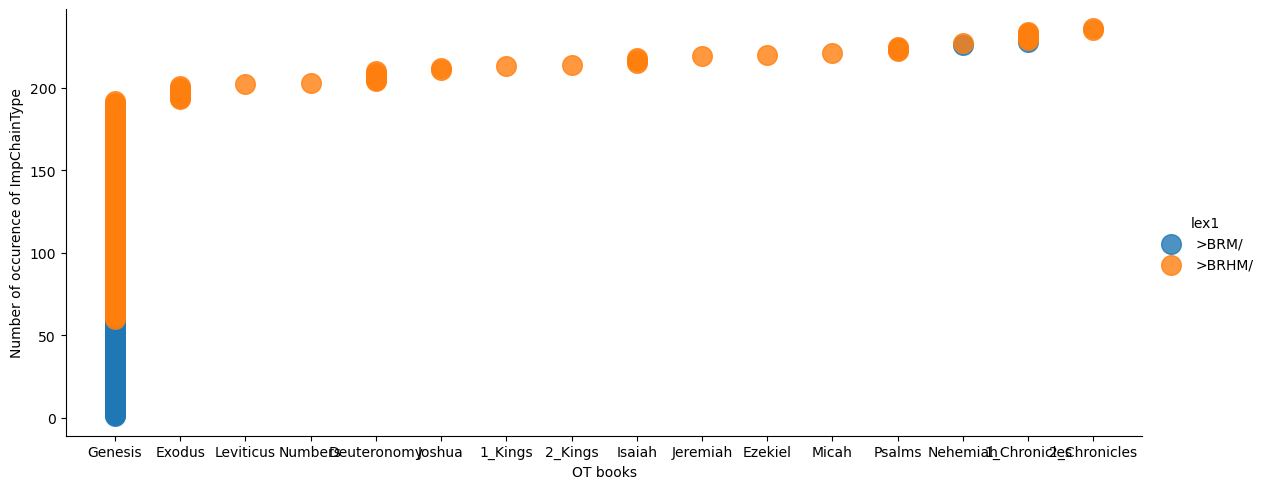

In [21]:
sns.lmplot(x="S1", y="R", data=BHSAbrahamSearch, hue='lex1', height=5, aspect=7/3, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

Text(0.5, 28.999999999999986, 'OT books')

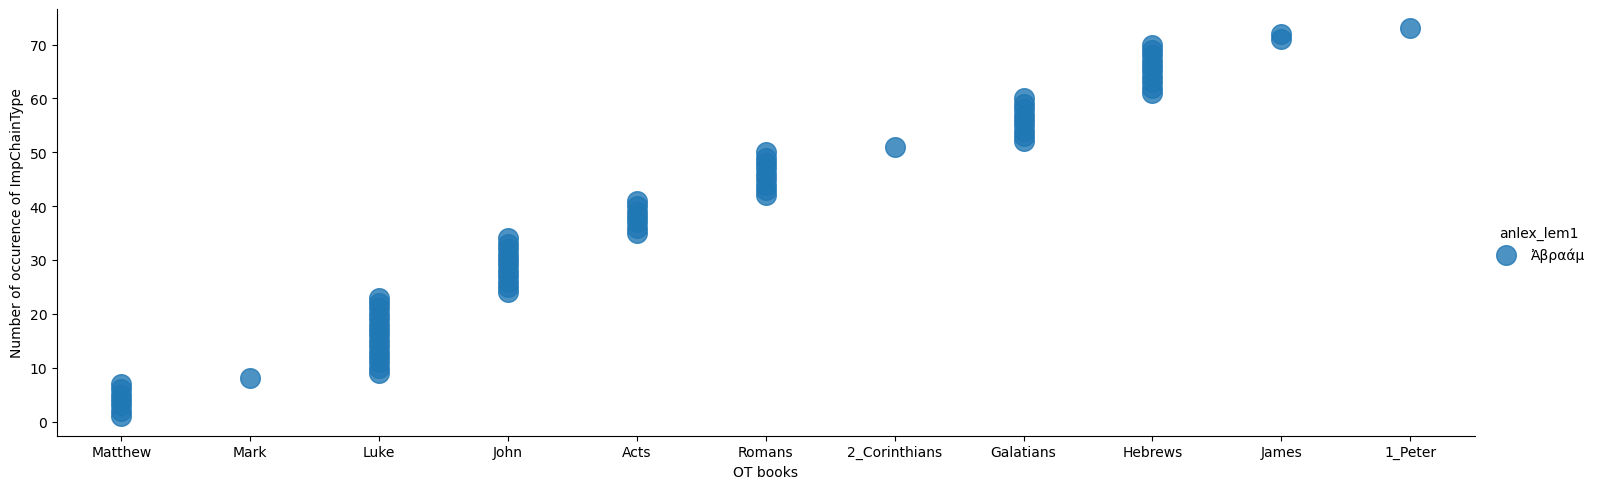

In [22]:
sns.lmplot(x="S1", y="R", data=NTAbrahamSearchLex, hue='anlex_lem1', height=5, aspect=9/3, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

## Simple Pie-Plotting

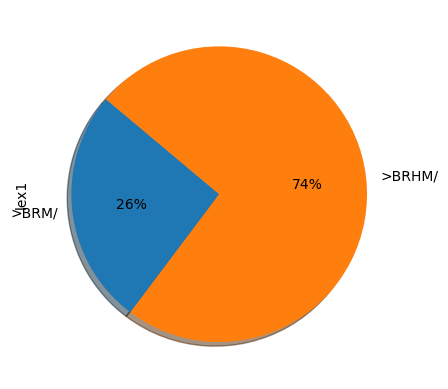

In [23]:
BHSAbrahamSearch.lex1.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

# Assignments

1. Import one of your own TF queries form the previous assignment (previous tutorial) and import it as a pandas dataframe.
2. Experiment with the different data-mining options you have learned in this notebook.
3. Make a simple plot of your choice to represent your query result.

# Whats Next?: Complex Query building
1. build VocabLists for Hebrew and Greek courses that you have to teach in the future.
2. We will us the remaining time to get issues and questions resolved.
3. We will learn the basic architecture of the BHS and the Tischendorf database.
4. Understanding the database better will allow us to build sophisticated queries, including syntax queries...